# DATA522 Final Exploration

In [ ]:
# Install libraries for reading in Parquet and OCR
%pip install pyarrow
%pip install ocrmac
# %pip install pytesseract
%pip install easyocr

# Pre-trained sentiment analysis model
%pip install transformers

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import easyocr
from ocrmac import ocrmac
import cv2
import PIL
from transformers import pipeline

In [3]:
# Get all data Parquets
training_filenames = [
    filename for filename in os.listdir('./data') if filename[-3:] != '.md'
]
training_parquets = [
    pd.read_parquet(f'data/{filename}').drop(columns = ['caption']) for filename in training_filenames[:1]
]

In [12]:
state_easyocr = {
    "reader": easyocr.Reader(['en'])
}

state_sentiment = {
    "stilbert": pipeline("sentiment-analysis")
}

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [5]:
def bytes2cv2(image):
    img_bytes = image['bytes']
    return cv2.imdecode(
        np.frombuffer(
            img_bytes, 
            np.uint8
        ),
        cv2.IMREAD_COLOR_RGB
    )
# https://stackoverflow.com/questions/17170752/python-opencv-load-image-from-byte-string
def imshow(image):
    decoded_image = bytes2cv2(image)
    plt.imshow(decoded_image)

In [ ]:
def analyze_sentiment(text):
    pipeline("sentiment-analysis")

In [6]:
def easyocr_filtertext(read_text):
    return ' '.join(read_text).upper()
def ocr_easyocr(image, state):
    decoded_image = bytes2cv2(image)
    return easyocr_filtertext(state['reader'].readtext(decoded_image, detail = 0))

In [7]:
def ocr_ocrmac(image, state):
    return ' '.join(
        [
            ocr_tuple[0] 
            for ocr_tuple 
            in ocrmac.text_from_image(
                PIL.Image.fromarray(
                    bytes2cv2(image)
                )
            )
        ]
    )

[('easyOCR', 'THE WINNER THANKED ALL THE FANS; THE SPONSORS; THE LINE JUDGES AND THE BALL BEAGLES. 32HDC_', [{'label': 'POSITIVE', 'score': 0.9976664781570435}]), ('macOCR', 'THE WINNER THANKED ALL THE FANS, THE SPONSORS, THE LINE JUDGES AND THE BALL BEAGLES...', [{'label': 'POSITIVE', 'score': 0.9995166063308716}])]


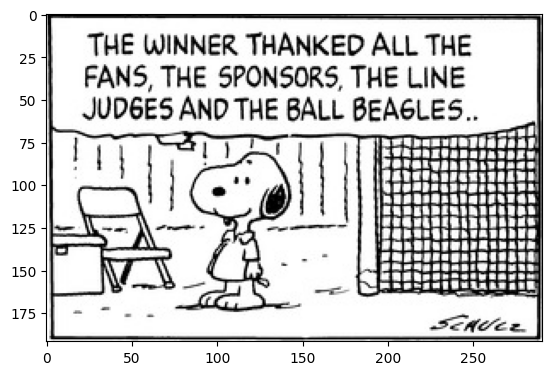

In [37]:
image = training_parquets[0].image[1982]
imshow(image)
sentiments = [
    ("easyOCR", ocr_easyocr(image, state_easyocr)),
    ("macOCR", ocr_ocrmac(image, {}))
]
analyzed_sentiments = [
    (sentiment[0],
     sentiment[1],
    state_sentiment["stilbert"]([sentiment[1]]) )
    for sentiment in sentiments
]
print(analyzed_sentiments)

